In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import shap
import xgboost as xgb

In [2]:
# users = pd.read_csv('../Jman-final-project-datasets-sg/users-sg.csv')
# user_skills = pd.read_csv('../Jman-final-project-datasets-sg/user_skill-sg.csv')
# skills = pd.read_csv('../Jman-final-project-datasets-sg/skill.csv')
# registrations = pd.read_csv('../Jman-final-project-datasets-sg/Registrations-sg.csv')
# interests = pd.read_csv('../Jman-final-project-datasets-sg/interest-sg.csv')
# events = pd.read_csv('../Jman-final-project-datasets-sg/event-sg.csv')

In [3]:
dataset = pd.read_csv('../Jman-final-project-datasets-om/dataset-snowflake.csv')
dataset

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,EXPERIENCE
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,Female,intern,7
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,Female,intern,10
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,Male,consultant,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,45,Lynelle,Le Noire,llenoire18@cam.ac.uk,Female,tribe master,9
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,Ailis,Stickney,astickney6@nih.gov,Female,senior software engineer,10
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,53,Mehetabel,Giocannoni,mgiocannoni1g@cdbaby.com,Female,junior software engineer,5
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,34,Modesta,Klimuk,mklimukx@examiner.com,Polygender,consultant,10


In [4]:
df = dataset.copy()
df

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,EXPERIENCE
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,Female,intern,7
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,Female,intern,10
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,Male,consultant,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,45,Lynelle,Le Noire,llenoire18@cam.ac.uk,Female,tribe master,9
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,Ailis,Stickney,astickney6@nih.gov,Female,senior software engineer,10
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,53,Mehetabel,Giocannoni,mgiocannoni1g@cdbaby.com,Female,junior software engineer,5
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,34,Modesta,Klimuk,mklimukx@examiner.com,Polygender,consultant,10


In [5]:
df.shape

(1000, 20)

In [6]:
df.describe()

,USERR_ID,EVENT_ID,CAPACITY,REGISTERED,ID,EXPERIENCE
count,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.000000
mean,49.438000,15.454000,46.42000,0.0,49.438000,4.929000
std,28.584213,8.637157,4.79652,0.0,28.584213,3.239823
min,1.000000,1.000000,40.00000,0.0,1.000000,0.000000
25%,24.750000,8.000000,40.00000,0.0,24.750000,2.000000
50%,49.000000,15.000000,50.00000,0.0,49.000000,5.000000
75%,74.000000,23.000000,50.00000,0.0,74.000000,7.000000
max,100.000000,30.000000,50.00000,0.0,100.000000,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   USERR_ID       1000 non-null   int64 
 1   EVENT_ID       1000 non-null   int64 
 2   NAME           1000 non-null   object
 3   DOMAIN         1000 non-null   object
 4   DATE           1000 non-null   object
 5   STARTTIME      1000 non-null   object
 6   ENDTIME        1000 non-null   object
 7   LOCATION       1000 non-null   object
 8   TRAINER        1000 non-null   object
 9   CAPACITY       1000 non-null   int64 
 10  REGISTERED     1000 non-null   int64 
 11  RESOURCE_LINK  1000 non-null   object
 12  DESCRIPTION    1000 non-null   object
 13  ID             1000 non-null   int64 
 14  FIRST_NAME     1000 non-null   object
 15  LAST_NAME      1000 non-null   object
 16  EMAIL          1000 non-null   object
 17  GENDER         1000 non-null   object
 18  DESIGNATION    1000 non-null 

In [8]:
null_count = df.isnull().sum()
null_count

USERR_ID         0
EVENT_ID         0
NAME             0
DOMAIN           0
DATE             0
STARTTIME        0
ENDTIME          0
LOCATION         0
TRAINER          0
CAPACITY         0
REGISTERED       0
RESOURCE_LINK    0
DESCRIPTION      0
ID               0
FIRST_NAME       0
LAST_NAME        0
EMAIL            0
GENDER           0
DESIGNATION      0
EXPERIENCE       0
dtype: int64

In [9]:
percentage_null = (null_count / len(df)) * 100
percentage_null

USERR_ID         0.0
EVENT_ID         0.0
NAME             0.0
DOMAIN           0.0
DATE             0.0
STARTTIME        0.0
ENDTIME          0.0
LOCATION         0.0
TRAINER          0.0
CAPACITY         0.0
REGISTERED       0.0
RESOURCE_LINK    0.0
DESCRIPTION      0.0
ID               0.0
FIRST_NAME       0.0
LAST_NAME        0.0
EMAIL            0.0
GENDER           0.0
DESIGNATION      0.0
EXPERIENCE       0.0
dtype: float64

In [10]:
df

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,EXPERIENCE
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,Female,intern,7
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,Female,intern,10
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,Male,consultant,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,45,Lynelle,Le Noire,llenoire18@cam.ac.uk,Female,tribe master,9
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,Ailis,Stickney,astickney6@nih.gov,Female,senior software engineer,10
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,53,Mehetabel,Giocannoni,mgiocannoni1g@cdbaby.com,Female,junior software engineer,5
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,34,Modesta,Klimuk,mklimukx@examiner.com,Polygender,consultant,10


In [11]:
df.head(5)

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,EXPERIENCE
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,Female,intern,7
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,Female,intern,10
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,Male,consultant,0


In [12]:
df['React'] = np.random.choice([True, False], size=len(df))
df['Javascript'] = np.random.choice([True, False], size=len(df))
df['Node'] = np.random.choice([True, False], size=len(df))
df['Python'] = np.random.choice([True, False], size=len(df))
df['Machine_Learning'] = np.random.choice([True, False], size=len(df))
df['NoSQL'] = np.random.choice([True, False], size=len(df))
df['ETL'] = np.random.choice([True, False], size=len(df))
df['Data_Warehouse'] = np.random.choice([True, False], size=len(df))
df['Big_Data'] = np.random.choice([True, False], size=len(df))
df['HTML'] = np.random.choice([True, False], size=len(df))
df['SQL'] = np.random.choice([True, False], size=len(df))


In [13]:
df['React'] = df.groupby('USERR_ID')['React'].transform('first')
df['Javascript'] = df.groupby('USERR_ID')['Javascript'].transform('first')
df['Node'] = df.groupby('USERR_ID')['Node'].transform('first')
df['Python'] = df.groupby('USERR_ID')['Python'].transform('first')
df['Machine_Learning'] = df.groupby('USERR_ID')['Machine_Learning'].transform('first')
df['NoSQL'] = df.groupby('USERR_ID')['NoSQL'].transform('first')
df['ETL'] = df.groupby('USERR_ID')['ETL'].transform('first')
df['Data_Warehouse'] = df.groupby('USERR_ID')['Data_Warehouse'].transform('first')
df['Big_Data'] = df.groupby('USERR_ID')['Big_Data'].transform('first')
df['HTML'] = df.groupby('USERR_ID')['HTML'].transform('first')
df['SQL'] = df.groupby('USERR_ID')['SQL'].transform('first')

In [14]:
df.head(5)

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,...,True,False,False,True,True,True,False,True,False,True
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,...,True,False,True,False,True,True,False,True,True,False
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,...,False,False,True,True,True,True,True,True,True,True
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,...,False,False,True,True,True,True,True,True,True,True
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,...,True,True,True,True,True,True,True,False,False,False


In [15]:
df = df.drop(columns=['EVENT_ID','USERR_ID','REGISTERED','RESOURCE_LINK',
                      'DESCRIPTION','ID','FIRST_NAME','LAST_NAME', 'EMAIL'])
df.head(5)

,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,Female,intern,...,True,False,False,True,True,True,False,True,False,True
1,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,Female,intern,...,True,False,True,False,True,True,False,True,True,False
2,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,Male,consultant,...,False,False,True,True,True,True,True,True,True,True
3,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,Male,consultant,...,False,False,True,True,True,True,True,True,True,True
4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,Male,consultant,...,True,True,True,True,True,True,True,False,False,False


In [16]:
df['STARTTIME'] = pd.to_datetime(df['STARTTIME'], format='%H:%M:%S')
df['ENDTIME'] = pd.to_datetime(df['ENDTIME'], format='%H:%M:%S')

In [17]:
df['DURATION'] = (df['STARTTIME'] - df['ENDTIME']).dt.total_seconds() / 3600
df['DURATION'] = df['DURATION'].abs()
df['DURATION'] = df['DURATION'].round()

df

,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,...,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION
0,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,1900-01-01 17:35:00,1900-01-01 07:17:00,aurum,Dermot Matteoni,50,Female,intern,...,False,False,True,True,True,False,True,False,True,10.0
1,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,1900-01-01 18:33:00,1900-01-01 02:24:00,falcon,Benjamen Pass,40,Female,intern,...,False,True,False,True,True,False,True,True,False,16.0
2,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,1900-01-01 21:09:00,1900-01-01 02:19:00,tardis,Anica Skeemor,40,Male,consultant,...,False,True,True,True,True,True,True,True,True,19.0
3,Data Analytics for Business Professionals,data-analytics,24-05-2024,1900-01-01 14:48:00,1900-01-01 01:59:00,jarvis,Cordey Panton,50,Male,consultant,...,False,True,True,True,True,True,True,True,True,13.0
4,Full Stack Development Bootcamp,full-stack,04-07-2023,1900-01-01 19:09:00,1900-01-01 03:37:00,aurum,Selma Eathorne,50,Male,consultant,...,True,True,True,True,True,True,False,False,False,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,1900-01-01 17:53:00,1900-01-01 03:11:00,tardis,Clemmie Gallaher,50,Female,tribe master,...,True,True,False,False,True,True,False,True,True,15.0
996,Databases Conference & Expo,database,04-04-2024,1900-01-01 14:51:00,1900-01-01 00:41:00,tardis,Kathryn Monckton,50,Female,senior software engineer,...,True,True,False,True,False,True,False,True,False,14.0
997,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,1900-01-01 16:33:00,1900-01-01 09:04:00,falcon,Murry Geharke,50,Female,junior software engineer,...,False,True,False,True,False,True,True,False,False,7.0
998,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,1900-01-01 17:53:00,1900-01-01 03:11:00,tardis,Clemmie Gallaher,50,Polygender,consultant,...,True,True,True,False,True,False,False,False,True,15.0


In [18]:
df = df.drop(columns=['STARTTIME', 'ENDTIME'])
df

,NAME,DOMAIN,DATE,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,...,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION
0,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,aurum,Dermot Matteoni,50,Female,intern,7,True,...,False,False,True,True,True,False,True,False,True,10.0
1,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,falcon,Benjamen Pass,40,Female,intern,10,True,...,False,True,False,True,True,False,True,True,False,16.0
2,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,tardis,Anica Skeemor,40,Male,consultant,1,True,...,False,True,True,True,True,True,True,True,True,19.0
3,Data Analytics for Business Professionals,data-analytics,24-05-2024,jarvis,Cordey Panton,50,Male,consultant,1,True,...,False,True,True,True,True,True,True,True,True,13.0
4,Full Stack Development Bootcamp,full-stack,04-07-2023,aurum,Selma Eathorne,50,Male,consultant,0,True,...,True,True,True,True,True,True,False,False,False,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,tardis,Clemmie Gallaher,50,Female,tribe master,9,True,...,True,True,False,False,True,True,False,True,True,15.0
996,Databases Conference & Expo,database,04-04-2024,tardis,Kathryn Monckton,50,Female,senior software engineer,10,True,...,True,True,False,True,False,True,False,True,False,14.0
997,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,falcon,Murry Geharke,50,Female,junior software engineer,5,True,...,False,True,False,True,False,True,True,False,False,7.0
998,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,tardis,Clemmie Gallaher,50,Polygender,consultant,10,False,...,True,True,True,False,True,False,False,False,True,15.0


In [19]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
df['MONTH'] = df['DATE'].dt.month

df

,NAME,DOMAIN,DATE,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,...,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,Advanced Data Engineering Techniques Seminar,data-engineering,2023-10-17,aurum,Dermot Matteoni,50,Female,intern,7,True,...,False,True,True,True,False,True,False,True,10.0,10
1,Full Stack Webinar Series: Frontend to Backend,full-stack,2023-07-23,falcon,Benjamen Pass,40,Female,intern,10,True,...,True,False,True,True,False,True,True,False,16.0,7
2,Data Science Summit: Cutting-Edge Research,data-science,2023-09-29,tardis,Anica Skeemor,40,Male,consultant,1,True,...,True,True,True,True,True,True,True,True,19.0,9
3,Data Analytics for Business Professionals,data-analytics,2024-05-24,jarvis,Cordey Panton,50,Male,consultant,1,True,...,True,True,True,True,True,True,True,True,13.0,5
4,Full Stack Development Bootcamp,full-stack,2023-07-04,aurum,Selma Eathorne,50,Male,consultant,0,True,...,True,True,True,True,True,False,False,False,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,full-stack,2024-04-02,tardis,Clemmie Gallaher,50,Female,tribe master,9,True,...,True,False,False,True,True,False,True,True,15.0,4
996,Databases Conference & Expo,database,2024-04-04,tardis,Kathryn Monckton,50,Female,senior software engineer,10,True,...,True,False,True,False,True,False,True,False,14.0,4
997,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,2023-12-13,falcon,Murry Geharke,50,Female,junior software engineer,5,True,...,True,False,True,False,True,True,False,False,7.0,12
998,Full Stack Showcase: Projects and Portfolios,full-stack,2024-04-02,tardis,Clemmie Gallaher,50,Polygender,consultant,10,False,...,True,True,False,True,False,False,False,True,15.0,4


In [20]:
df = df.drop(columns=['DATE'])
df

,NAME,DOMAIN,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,Javascript,...,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,Advanced Data Engineering Techniques Seminar,data-engineering,aurum,Dermot Matteoni,50,Female,intern,7,True,True,...,False,True,True,True,False,True,False,True,10.0,10
1,Full Stack Webinar Series: Frontend to Backend,full-stack,falcon,Benjamen Pass,40,Female,intern,10,True,True,...,True,False,True,True,False,True,True,False,16.0,7
2,Data Science Summit: Cutting-Edge Research,data-science,tardis,Anica Skeemor,40,Male,consultant,1,True,False,...,True,True,True,True,True,True,True,True,19.0,9
3,Data Analytics for Business Professionals,data-analytics,jarvis,Cordey Panton,50,Male,consultant,1,True,False,...,True,True,True,True,True,True,True,True,13.0,5
4,Full Stack Development Bootcamp,full-stack,aurum,Selma Eathorne,50,Male,consultant,0,True,True,...,True,True,True,True,True,False,False,False,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,full-stack,tardis,Clemmie Gallaher,50,Female,tribe master,9,True,False,...,True,False,False,True,True,False,True,True,15.0,4
996,Databases Conference & Expo,database,tardis,Kathryn Monckton,50,Female,senior software engineer,10,True,True,...,True,False,True,False,True,False,True,False,14.0,4
997,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,falcon,Murry Geharke,50,Female,junior software engineer,5,True,False,...,True,False,True,False,True,True,False,False,7.0,12
998,Full Stack Showcase: Projects and Portfolios,full-stack,tardis,Clemmie Gallaher,50,Polygender,consultant,10,False,True,...,True,True,False,True,False,False,False,True,15.0,4


In [21]:
label_encoder = LabelEncoder()

In [22]:
!pip install scipy

In [59]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Assuming df is your DataFrame

# Function to calculate Chi-square statistic for boolean columns
def chi_square_for_bool(df):
    chi2_dict = {}
    for col in df.columns:
        if df[col].dtype == bool:
            observed = pd.crosstab(df[col], df['DOMAIN'])  # Assuming 'target_column' is your target variable
            chi2, p, dof, expected = chi2_contingency(observed)
            chi2_dict[col] = (chi2, p)
    return chi2_dict

# Function to calculate ANOVA relation matrix for numerical columns
def anova_relation_matrix(df):
    anova_dict = {}
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            groups = [df[df['DOMAIN'] == val][col].dropna() for val in df['DOMAIN'].unique()]
            anova_result = f_oneway(*groups)
            anova_dict[col] = anova_result
    return anova_dict

In [60]:
chi2_results = chi_square_for_bool(df)
chi2_results


{'React': (2.666743778693089, 0.6150464379956873),
 'Javascript': (4.363637593845441, 0.35902408094109495),
 'Node': (0.4837135783089558, 0.9750669741276924),
 'Python': (3.425850729765271, 0.48924208935235625),
 'Machine_Learning': (5.524562398901782, 0.23757884680944352),
 'NoSQL': (1.8738166126722644, 0.7589531260450384),
 'ETL': (1.3425285526462658, 0.8541197396808075),
 'Data_Warehouse': (10.557557577577358, 0.03201331760501949),
 'Big_Data': (0.46143014131365523, 0.97714550078952),
 'HTML': (7.183017796376179, 0.12652691936505295),
 'SQL': (4.46318478698653, 0.3469351595222292)}

In [61]:
anova_results = anova_relation_matrix(df)
anova_results

{'CAPACITY': F_onewayResult(statistic=12.212634658947369, pvalue=1.0707960954283056e-09),
 'EXPERIENCE': F_onewayResult(statistic=1.6688807740226292, pvalue=0.15498956447362008),
 'DURATION': F_onewayResult(statistic=11.683666597944041, pvalue=2.82180773522523e-09),
 'MONTH': F_onewayResult(statistic=108.00002629510439, pvalue=1.869679208908053e-76)}

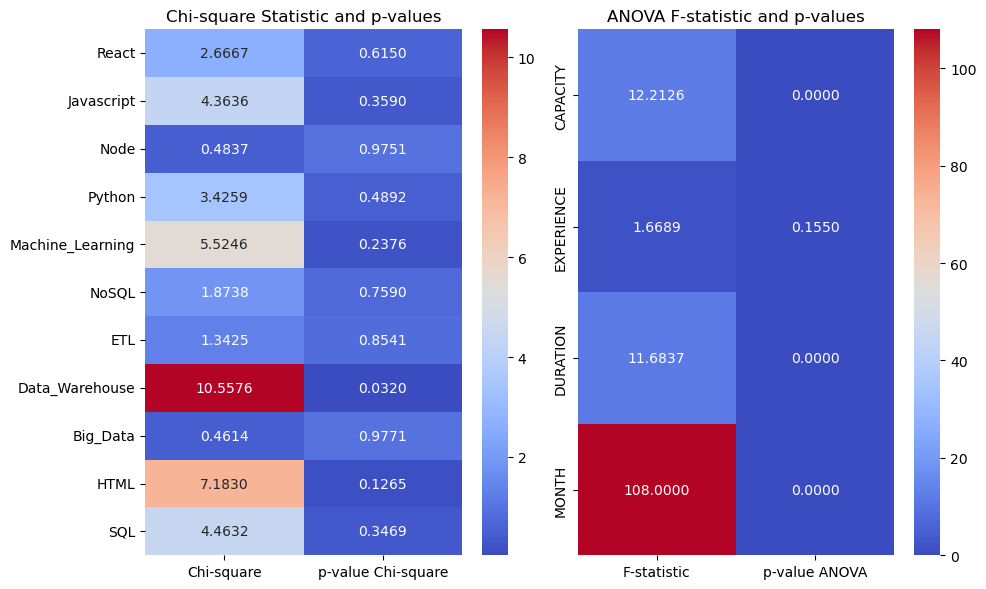

In [63]:
chi2_df = pd.DataFrame(chi2_results).T.rename(columns={0: 'Chi-square', 1: 'p-value Chi-square'})
anova_df = pd.DataFrame(anova_results).T.rename(columns={0: 'F-statistic', 1: 'p-value ANOVA'})

# Create heatmaps
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(chi2_df, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Chi-square Statistic and p-values')

plt.subplot(1, 2, 2)
sns.heatmap(anova_df, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('ANOVA F-statistic and p-values')

plt.tight_layout()
plt.show()


In [118]:
df_model = df.copy()
X = df_model.drop(columns=['DOMAIN'])
y = df_model['DOMAIN']

In [119]:
X

,NAME,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,Advanced Data Engineering Techniques Seminar,aurum,Dermot Matteoni,50,Female,intern,7,True,True,False,False,True,True,True,False,True,False,True,10.0,10
1,Full Stack Webinar Series: Frontend to Backend,falcon,Benjamen Pass,40,Female,intern,10,True,True,False,True,False,True,True,False,True,True,False,16.0,7
2,Data Science Summit: Cutting-Edge Research,tardis,Anica Skeemor,40,Male,consultant,1,True,False,False,True,True,True,True,True,True,True,True,19.0,9
3,Data Analytics for Business Professionals,jarvis,Cordey Panton,50,Male,consultant,1,True,False,False,True,True,True,True,True,True,True,True,13.0,5
4,Full Stack Development Bootcamp,aurum,Selma Eathorne,50,Male,consultant,0,True,True,True,True,True,True,True,True,False,False,False,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Full Stack Showcase: Projects and Portfolios,tardis,Clemmie Gallaher,50,Female,tribe master,9,True,False,True,True,False,False,True,True,False,True,True,15.0,4
996,Databases Conference & Expo,tardis,Kathryn Monckton,50,Female,senior software engineer,10,True,True,True,True,False,True,False,True,False,True,False,14.0,4
997,Full Stack Tech Talks: Cutting-Edge Technologies,falcon,Murry Geharke,50,Female,junior software engineer,5,True,False,False,True,False,True,False,True,True,False,False,7.0,12
998,Full Stack Showcase: Projects and Portfolios,tardis,Clemmie Gallaher,50,Polygender,consultant,10,False,True,True,True,True,False,True,False,False,False,True,15.0,4


In [120]:
X.columns

Index(['NAME', 'LOCATION', 'TRAINER', 'CAPACITY', 'GENDER', 'DESIGNATION',
       'EXPERIENCE', 'React', 'Javascript', 'Node', 'Python',
       'Machine_Learning', 'NoSQL', 'ETL', 'Data_Warehouse', 'Big_Data',
       'HTML', 'SQL', 'DURATION', 'MONTH'],
      dtype='object')

In [121]:
# X=X.drop(columns=['ETL', 'Data_Warehpouse', 'SQL',
#        'Big_Data', 'Data_pipeline', 'HTML', 'Javascript', 'React.js',
#        'Node.js', 'Data_Visualization', 'Statistics', 'Python', 'R',
#        'Machine_Learning', 'Business_intelligence_tools', 'No_Sql',
#        'Data_modelling'])

X = X.drop(columns=['NAME','TRAINER','LOCATION'])

In [122]:
X

,CAPACITY,GENDER,DESIGNATION,EXPERIENCE,React,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,50,Female,intern,7,True,True,False,False,True,True,True,False,True,False,True,10.0,10
1,40,Female,intern,10,True,True,False,True,False,True,True,False,True,True,False,16.0,7
2,40,Male,consultant,1,True,False,False,True,True,True,True,True,True,True,True,19.0,9
3,50,Male,consultant,1,True,False,False,True,True,True,True,True,True,True,True,13.0,5
4,50,Male,consultant,0,True,True,True,True,True,True,True,True,False,False,False,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50,Female,tribe master,9,True,False,True,True,False,False,True,True,False,True,True,15.0,4
996,50,Female,senior software engineer,10,True,True,True,True,False,True,False,True,False,True,False,14.0,4
997,50,Female,junior software engineer,5,True,False,False,True,False,True,False,True,True,False,False,7.0,12
998,50,Polygender,consultant,10,False,True,True,True,True,False,True,False,False,False,True,15.0,4


In [156]:
X_test=[50,0,3,7,True,True,True,True,True,True,True,True,True,True,True,10,10]
# X_encoded=X_test.apply(label_encoder.fit_transform)
print(np.shape(X_test))


(17,)


C:\Users\OmShree\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[50.  0.  3.  7.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 10. 10.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [157]:
X_test = np.array([50, 0, 3, 7, True, True, True, True, True, True, True, True, True, True, True, 10, 10])

# Reshape X_test to a 2D array with a single row
X_test_reshaped = X_test.reshape(1, -1)

# Check the shape of X_test_reshaped
print(np.shape(X_test_reshaped))

(1, 17)


In [159]:
y_pred = model.predict(X_test_reshaped)
y_pred

C:\Users\OmShree\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array(['data-engineering'], dtype=object)

In [124]:
y

0      data-engineering
1            full-stack
2          data-science
3        data-analytics
4            full-stack
             ...       
995          full-stack
996            database
997          full-stack
998          full-stack
999        data-science
Name: DOMAIN, Length: 1000, dtype: object

In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
X_encoded = X.apply(label_encoder.fit_transform)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [127]:
# Define hyperparameter grids for each model
param_grid_lr = {'C': [ 0.1, 1, 10]}


In [128]:
# Define the logistic regression model
lr = LogisticRegression()

# Define the grid search parameters
param_grid_lr = {'C': [0.1, 1, 10]}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search_lr.best_params_)

# Get the best model
best_lr = grid_search_lr.best_estimator_

# Evaluate the best model on the test set
y_pred = best_lr.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\OmShree\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OmShree\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Best parameters: {'C': 0.1}
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.83      0.21      0.33        24
data-engineering       0.67      0.18      0.28        34
    data-science       0.00      0.00      0.00        31
        database       0.46      0.72      0.56        43
      full-stack       0.46      0.78      0.58        68

        accuracy                           0.47       200
       macro avg       0.49      0.38      0.35       200
    weighted avg       0.47      0.47      0.41       200



C:\Users\OmShree\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
best_lr = LogisticRegression(C=0.1)

# Train the model
best_lr.fit(X_train, y_train)

# Make predictions
y_pred = best_lr.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.83      0.21      0.33        24
data-engineering       0.67      0.18      0.28        34
    data-science       0.00      0.00      0.00        31
        database       0.46      0.72      0.56        43
      full-stack       0.46      0.78      0.58        68

        accuracy                           0.47       200
       macro avg       0.49      0.38      0.35       200
    weighted avg       0.47      0.47      0.41       200



C:\Users\OmShree\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:



# # Define hyperparameter grids for each model
# param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10]}
# param_grid_dt = {'max_depth': [3, 5, 7, 9, 11]}
# param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7 ]}
# param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2,0.5]}
# param_grid_xgb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2, 0.5]}

# # Initialize models
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "XGBoost": XGBClassifier()
# }

# # Define hyperparameter grids for each model
# param_grids = {
#     "Logistic Regression": param_grid_lr,
#     "Decision Tree": param_grid_dt,
#     "Random Forest": param_grid_rf,
#     "Gradient Boosting": param_grid_gb,
#     "XGBoost": param_grid_xgb
# }

# # Perform hyperparameter tuning for each model
# for name, model in models.items():
#     grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', verbose=1)
#     grid_search.fit(X_train, y_train)
    
#     # Get the best parameters and best score
#     best_params = grid_search.best_params_
#     best_score = grid_search.best_score_
#     print(f"Best parameters for {name}: {best_params}")
#     print(f"Best score for {name}: {best_score}")

#     # Evaluate the best model
#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy for {name}: {accuracy}")
#     print(classification_report(y_test, y_pred))
#     print("--------------------------------------------")



In [131]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.945
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.88      0.92      0.90        24
data-engineering       1.00      1.00      1.00        34
    data-science       0.96      0.84      0.90        31
        database       1.00      1.00      1.00        43
      full-stack       0.90      0.94      0.92        68

        accuracy                           0.94       200
       macro avg       0.95      0.94      0.94       200
    weighted avg       0.95      0.94      0.94       200



In [132]:
from sklearn.ensemble import RandomForestClassifier

# Initialize random forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.84
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.95      0.75      0.84        24
data-engineering       0.91      0.59      0.71        34
    data-science       0.81      0.71      0.76        31
        database       0.83      1.00      0.91        43
      full-stack       0.81      0.96      0.88        68

        accuracy                           0.84       200
       macro avg       0.86      0.80      0.82       200
    weighted avg       0.85      0.84      0.83       200



In [133]:
from sklearn.svm import SVC

# Initialize SVM model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.535
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.64      0.38      0.47        24
data-engineering       1.00      0.03      0.06        34
    data-science       1.00      0.10      0.18        31
        database       0.51      0.70      0.59        43
      full-stack       0.52      0.94      0.67        68

        accuracy                           0.54       200
       macro avg       0.73      0.43      0.39       200
    weighted avg       0.69      0.54      0.45       200



In [134]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize gradient boosting model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.94
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.91      0.88      0.89        24
data-engineering       1.00      1.00      1.00        34
    data-science       0.93      0.84      0.88        31
        database       1.00      1.00      1.00        43
      full-stack       0.89      0.94      0.91        68

        accuracy                           0.94       200
       macro avg       0.95      0.93      0.94       200
    weighted avg       0.94      0.94      0.94       200



In [135]:
# X_test=[50,'Male','consultant',]
# y_pred = model.predict(X_test)